In [1]:
import numpy as np
import scipy.signal

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.distributions.normal import Normal

In [2]:
from copy import deepcopy
import gym
from gym import spaces
import time
from spinup.utils.logx import EpochLogger

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas

In [5]:
base_dir='/home/dauce/Recherche/stages/Laurene Carminatti 2021/'

In [6]:
color = ['blue', 'orange', 'green','red','magenta']
labels = ['MaCAO','SAC', 'PPO', 'TD3']

In [28]:
mountain_expes = ['spinningup/data/mountaincar_macao_test/mountaincar_macao_test_s0',
         'spinningup/data/mountaincar_sac_test/mountaincar_sac_test_s0',
           'spinningup/data/mountaincar_ppo_test/mountaincar_ppo_test_s0',
            'spinningup/data/mountaincar_td3_test_sta1000/mountaincar_td3_test_sta1000_s0']

swimmer_expes = ['spinningup/data/swimmer_macao_test/swimmer_macao_test_s1',
         'spinningup/data/swimmer_sac_test/swimmer_sac_test_s1',
           'spinningup/data/swimmer_ppo_test/swimmer_ppo_test_s1',
           'spinningup/data/td3-swimmer/td3-swimmer_s0']

walker_expes = ['test/e3d-sac-walker-BETA=30-k=10-E3D=True-zu-ep-1600-noproj3',
          'test/e3d-sac-walker-BETA=30-k=10-E3D=False-zu-ep-1600-noproj3' ,
           'spinningup/data/ppo-bipedal/ppo-bipedal_s0',
           'spinningup/data/td3-bipedal/td3-bipedal_s0']

ant_expes = ['test/e3d-sac-ant-BETA=10-k=3-E3D=True-zt-det-256',
         'test/sac-ant-BETA=5-k=10-E3D=False-256',
           'spinningup/data/ppo-ant/ppo-ant_s0',
           'spinningup/data/td3-ant/td3-ant_s0']

humanoid_expes = [
           'test/e3d-humanoid-BETA=10-k=30-E3D=True-zv-bandwidth-1-256-gamma-98',
           'test/e3d-humanoid-BETA=10-k=30-E3D=False-zv-bandwidth-1-256-gamma-98',
        'spinningup/data/ppo-humanoid/ppo-humanoid_s0',
           'spinningup/data/td3-humanoid/td3-humanoid_s0']



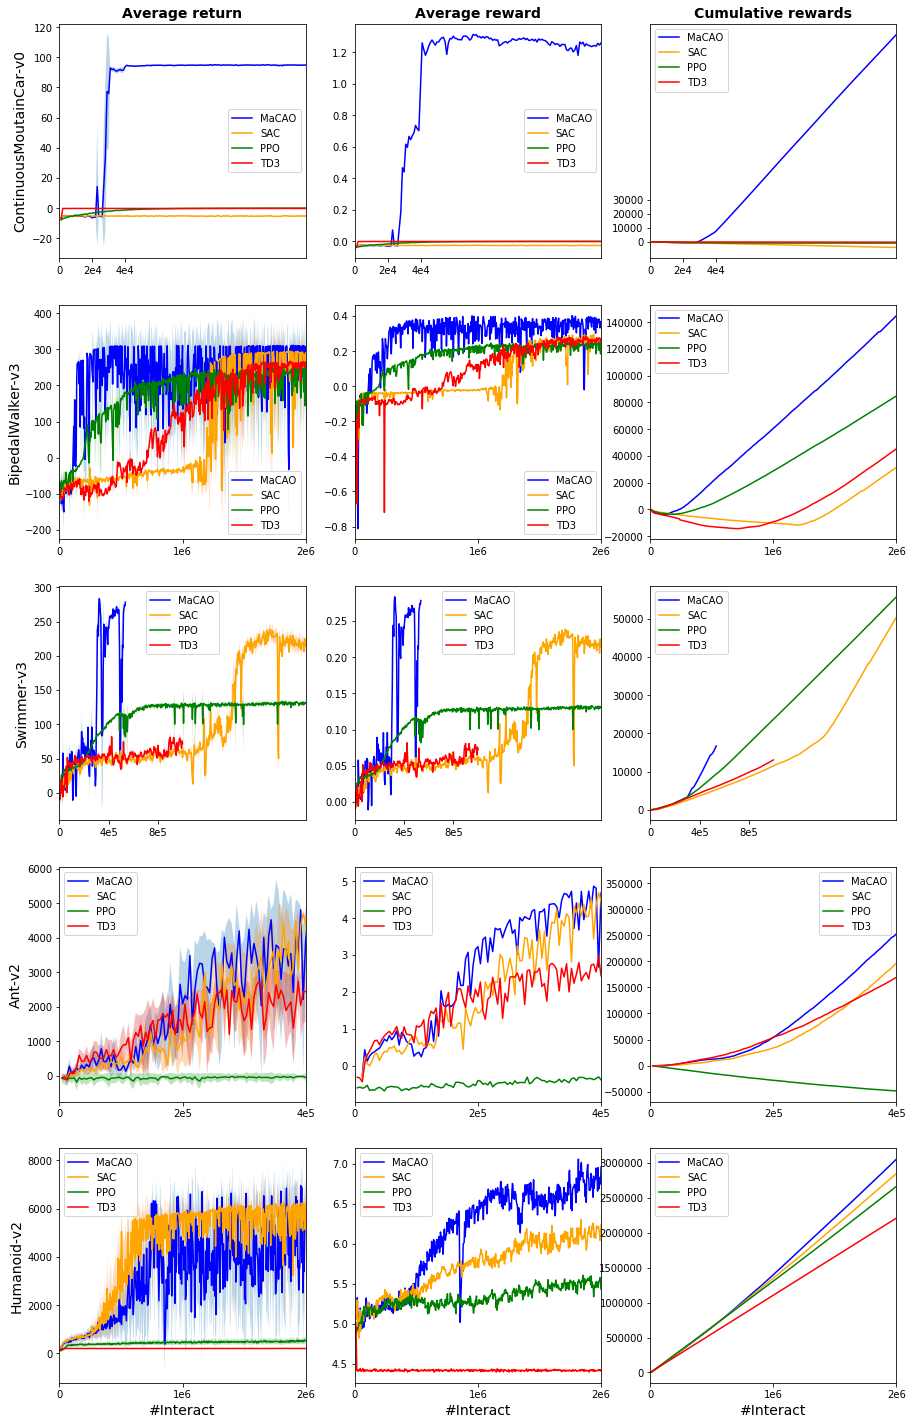

In [29]:
plt.figure(figsize=(15,25))

ax = plt.subplot(5,3,1)
metric = 'EpRet'
for i, expe in enumerate(mountain_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    ax.plot(mat.TotalEnvInteracts, mat[f'Average{metric}'], label=labels[i], c=color[i])
    ax.fill_between(mat.TotalEnvInteracts, mat[f'Average{metric}']-mat[f'Std{metric}'], 
                     mat[f'Average{metric}']+mat[f'Std{metric}'],alpha=.3)
    #plt.plot(mat.TotalEnvInteracts,  mat[f'Max{metric}'],'.b',markersize=4, alpha=.3, c=color[i])
    #plt.plot(mat.TotalEnvInteracts,  mat[f'Min{metric}'],'.b',markersize=4, alpha=.3, c=color[i])
    plt.plot()
#ax.set_xlabel('#Interact')
ax.legend()
ax.set_title('Average return', fontsize=14, fontweight='bold')
ax.set_ylabel('ContinuousMoutainCar-v0', fontsize=14)
ax.set_xlim(0,150000)
ax.set_xticks((0,2e4,4e4))
ax.set_xticklabels(('0','2e4','4e4'))


ax = plt.subplot(5,3,2)
steps_per_epoch = 1000
for i, expe in enumerate(mountain_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    total_ret = mat['AverageEpRet']
    duration = mat['EpLen']
    avg_ret = total_ret / duration 
    ax.plot(mat.TotalEnvInteracts, avg_ret, c=color[i], label=labels[i])
#ax.set_xlabel('#Interact')
ax.legend()
ax.set_title('Average reward', fontsize=14, fontweight='bold')
ax.set_xlim(0,150000)
ax.set_xticks((0,2e4,4e4))
ax.set_xticklabels(('0','2e4','4e4'))

ax = plt.subplot(5,3,3)
steps_per_epoch = 1000
for i, expe in enumerate(mountain_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    total_ret = mat['AverageEpRet']
    duration = mat['EpLen']
    avg_ret = total_ret / duration * steps_per_epoch
    ax.plot(mat.TotalEnvInteracts, np.cumsum(avg_ret), c=color[i], label=labels[i])
#ax.set_xlabel('#Interact')
ax.legend()
ax.set_title('Cumulative rewards', fontsize=14, fontweight='bold')
ax.set_yticks([0,1e4,2e4,3e4])
ax.set_xlim(0,150000)
ax.set_xticks((0,2e4,4e4))
ax.set_xticklabels(('0','2e4','4e4'))

ax = plt.subplot(5,3,4)
metric = 'EpRet'
for i, expe in enumerate(walker_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    ax.plot(mat.TotalEnvInteracts, mat[f'Average{metric}'], label=labels[i], c=color[i])
    ax.fill_between(mat.TotalEnvInteracts, mat[f'Average{metric}']-mat[f'Std{metric}'], 
                     mat[f'Average{metric}']+mat[f'Std{metric}'],alpha=.3)
    #plt.plot(mat.TotalEnvInteracts,  mat[f'Max{metric}'],'.b',markersize=4, alpha=.3, c=color[i])
    #plt.plot(mat.TotalEnvInteracts,  mat[f'Min{metric}'],'.b',markersize=4, alpha=.3, c=color[i])
    plt.plot()
ax.legend()
ax.set_ylabel('BipedalWalker-v3', fontsize=14)
ax.set_xlim(0,2e6)
ax.set_xticks((0,1e6,2e6))
ax.set_xticklabels(('0','1e6','2e6'))


ax = plt.subplot(5,3,5)
steps_per_epoch = 1000
for i, expe in enumerate(walker_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    total_ret = mat['AverageEpRet']
    duration = mat['EpLen']
    avg_ret = total_ret / duration 
    ax.plot(mat.TotalEnvInteracts, avg_ret, c=color[i], label=labels[i])
#ax.set_xlabel('#Interact')
ax.legend()
ax.set_xlim(0,2e6)
ax.set_xticks((0,1e6,2e6))
ax.set_xticklabels(('0','1e6','2e6'))

ax = plt.subplot(5,3,6)
steps_per_epoch = 1000
for i, expe in enumerate(walker_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    total_ret = mat['AverageEpRet']
    duration = mat['EpLen']
    avg_ret = total_ret / duration * steps_per_epoch
    ax.plot(mat.TotalEnvInteracts, np.cumsum(avg_ret), c=color[i], label=labels[i])
#ax.set_xlabel('#Interact')
ax.legend()
ax.set_xlim(0,2e6)
ax.set_xticks((0,1e6,2e6))
ax.set_xticklabels(('0','1e6','2e6'))

ax = plt.subplot(5,3,7)
metric = 'EpRet'
for i, expe in enumerate(swimmer_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    ax.plot(mat.TotalEnvInteracts, mat[f'Average{metric}'], label=labels[i], c=color[i])
    ax.fill_between(mat.TotalEnvInteracts, mat[f'Average{metric}']-mat[f'Std{metric}'], 
                     mat[f'Average{metric}']+mat[f'Std{metric}'],alpha=.3)
    #plt.plot(mat.TotalEnvInteracts,  mat[f'Max{metric}'],'.b',markersize=4, alpha=.3, c=color[i])
    #plt.plot(mat.TotalEnvInteracts,  mat[f'Min{metric}'],'.b',markersize=4, alpha=.3, c=color[i])
    plt.plot()
ax.legend()
ax.set_ylabel('Swimmer-v3', fontsize=14)
ax.set_xlim(0,2e6)
ax.set_xticks((0,4e5,8e5))
ax.set_xticklabels(('0','4e5','8e5'))


ax = plt.subplot(5,3,8)
steps_per_epoch = 1000
for i, expe in enumerate(swimmer_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    total_ret = mat['AverageEpRet']
    duration = mat['EpLen']
    avg_ret = total_ret / duration 
    ax.plot(mat.TotalEnvInteracts, avg_ret, c=color[i], label=labels[i])
#ax.set_xlabel('#Interact')
ax.legend()
ax.set_xlim(0,2e6)
ax.set_xticks((0,4e5,8e5))
ax.set_xticklabels(('0','4e5','8e5'))

ax = plt.subplot(5,3,9)
steps_per_epoch = 1000
for i, expe in enumerate(swimmer_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    total_ret = mat['AverageEpRet']
    duration = mat['EpLen']
    avg_ret = total_ret / duration * steps_per_epoch
    ax.plot(mat.TotalEnvInteracts, np.cumsum(avg_ret), c=color[i], label=labels[i])
#ax.set_xlabel('#Interact')
ax.legend()
ax.set_xlim(0,2e6)
ax.set_xticks((0,4e5,8e5))
ax.set_xticklabels(('0','4e5','8e5'))

ax = plt.subplot(5,3,10)
metric = 'EpRet'
for i, expe in enumerate(ant_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    ax.plot(mat.TotalEnvInteracts, mat[f'Average{metric}'], label=labels[i], c=color[i])
    ax.fill_between(mat.TotalEnvInteracts, mat[f'Average{metric}']-mat[f'Std{metric}'], 
                     mat[f'Average{metric}']+mat[f'Std{metric}'],alpha=.3)
    #plt.plot(mat.TotalEnvInteracts,  mat[f'Max{metric}'],'.b',markersize=4, alpha=.3, c=color[i])
    #plt.plot(mat.TotalEnvInteracts,  mat[f'Min{metric}'],'.b',markersize=4, alpha=.3, c=color[i])
    plt.plot()
ax.legend()
ax.set_ylabel('Ant-v2', fontsize=14)
ax.set_xlim(0,4e5)
ax.set_xticks((0,2e5,4e5))
ax.set_xticklabels(('0','2e5','4e5'))


ax = plt.subplot(5,3,11)
steps_per_epoch = 1000
for i, expe in enumerate(ant_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    total_ret = mat['AverageEpRet']
    duration = mat['EpLen']
    avg_ret = total_ret / duration 
    ax.plot(mat.TotalEnvInteracts, avg_ret, c=color[i], label=labels[i])
#ax.set_xlabel('#Interact')
ax.legend()
ax.set_xlim(0,4e5)
ax.set_xticks((0,2e5,4e5))
ax.set_xticklabels(('0','2e5','4e5'))

ax = plt.subplot(5,3,12)
steps_per_epoch = 1000
for i, expe in enumerate(ant_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    total_ret = mat['AverageEpRet']
    duration = mat['EpLen']
    avg_ret = total_ret / duration * steps_per_epoch
    ax.plot(mat.TotalEnvInteracts, np.cumsum(avg_ret), c=color[i], label=labels[i])
#ax.set_xlabel('#Interact')
ax.legend()
ax.set_xlim(0,4e5)
ax.set_xticks((0,2e5,4e5))
ax.set_xticklabels(('0','2e5','4e5'))

ax = plt.subplot(5,3,13)
metric = 'EpRet'
for i, expe in enumerate(humanoid_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    ax.plot(mat.TotalEnvInteracts, mat[f'Average{metric}'], label=labels[i], c=color[i])
    ax.fill_between(mat.TotalEnvInteracts, mat[f'Average{metric}']-mat[f'Std{metric}'], 
                     mat[f'Average{metric}']+mat[f'Std{metric}'],alpha=.3)
    #plt.plot(mat.TotalEnvInteracts,  mat[f'Max{metric}'],'.b',markersize=4, alpha=.3, c=color[i])
    #plt.plot(mat.TotalEnvInteracts,  mat[f'Min{metric}'],'.b',markersize=4, alpha=.3, c=color[i])
    plt.plot()
ax.set_xlabel('#Interact')
ax.legend()
ax.set_ylabel('Humanoid-v2', fontsize=14)
ax.set_xlim(0,2e6)
ax.set_xticks((0,1e6,2e6))
ax.set_xticklabels(('0','1e6','2e6'))
ax.set_xlabel('#Interact', fontsize=14)


ax = plt.subplot(5,3,14)
steps_per_epoch = 1000
for i, expe in enumerate(humanoid_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    total_ret = mat['AverageEpRet']
    duration = mat['EpLen']
    avg_ret = total_ret / duration 
    ax.plot(mat.TotalEnvInteracts, avg_ret, c=color[i], label=labels[i])
#ax.set_xlabel('#Interact')
ax.legend()
ax.set_xlim(0,2e6)
ax.set_xticks((0,1e6,2e6))
ax.set_xticklabels(('0','1e6','2e6'))
ax.set_xlabel('#Interact', fontsize=14)


ax = plt.subplot(5,3,15)
steps_per_epoch = 1000
for i, expe in enumerate(humanoid_expes):
    output_dir = base_dir + expe  
    mat = pandas.read_csv(output_dir+'/progress.txt','\t')
    total_ret = mat['AverageEpRet']
    duration = mat['EpLen']
    avg_ret = total_ret / duration * steps_per_epoch
    ax.plot(mat.TotalEnvInteracts, np.cumsum(avg_ret), c=color[i], label=labels[i])
#ax.set_xlabel('#Interact')
ax.legend()
ax.set_xlim(0,2e6)
ax.set_xticks((0,1e6,2e6))
ax.set_xticklabels(('0','1e6','2e6'))
ax.set_xlabel('#Interact', fontsize=14)


plt.savefig('211029_macao_cmp.pdf', bbox_inches='tight')

In [26]:
env = gym.make('Ant-v2')

/home/dauce/.local/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [19]:
obs = env.reset()

In [20]:
obs.shape

(111,)

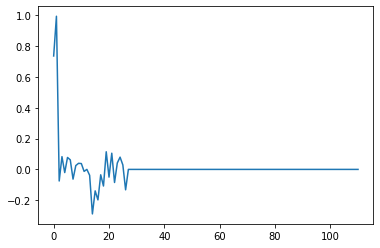

In [21]:
plt.plot(obs)

In [22]:
len(env.action_space.sample())

8